#  Conv.運作與參數生成
## - Conv.的參數設定
## - Conv.怎麼運算
## - Conv.權重如何生成
## - 權重那要用哪生成方式


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Conv.的參數設定
<font size=3>**範例1:bias有沒有設定的差異** </font>

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  1              |  2               |   3          |  0     |
| Example 2 |  1              |  2               |   3          |  1     |


In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[-0.0955,  0.2040,  0.1964],
          [-0.0122, -0.0150,  0.0365],
          [-0.0105,  0.0182,  0.2146]]],


        [[[-0.2237,  0.0800, -0.1930],
          [-0.2846,  0.0219, -0.0950],
          [ 0.2534, -0.2277,  0.1908]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([-0.1771,  0.0620], requires_grad=True)


In [3]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, bias=False)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.0036,  0.0867,  0.2280],
          [-0.0733,  0.0442, -0.0924],
          [ 0.1109, -0.0242,  0.0504]]],


        [[[ 0.0676, -0.1874,  0.1943],
          [-0.1494, -0.3223, -0.1747],
          [ 0.2618, -0.3333,  0.3122]]]], requires_grad=True)
bias of conv layer:
None


<font size=3>**範例2: Input channel和output channel都增加** </font>

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  2              |  2               |   3          |  0     |
| Example 2 |  2              |  3               |   3          |  0     |


In [4]:
conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, bias=False)
print('weight tensor of conv layer:\n{}'.format(conv.weight))
print('bias tensor of conv layer:\n{}'.format(conv.bias))

weight tensor of conv layer:
Parameter containing:
tensor([[[[-0.1888,  0.2050,  0.2145],
          [ 0.1028, -0.0710, -0.1288],
          [-0.0976,  0.0043, -0.0155]],

         [[ 0.0964,  0.0499, -0.1557],
          [ 0.1069, -0.2076, -0.1713],
          [ 0.0154, -0.0248, -0.0156]]],


        [[[ 0.1097,  0.1680,  0.1191],
          [-0.1295, -0.0294,  0.2040],
          [-0.2148,  0.0862,  0.2299]],

         [[ 0.0383,  0.1445,  0.0144],
          [-0.1566,  0.1622,  0.1876],
          [ 0.1223, -0.1223, -0.0704]]]], requires_grad=True)
bias tensor of conv layer:
None


In [7]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3, stride=1, bias=False)
print('weight tensor of conv layer:\n{}'.format(conv.weight))
print('bias tensor of conv layer:\n{}'.format(conv.bias))

weight tensor of conv layer:
Parameter containing:
tensor([[[[-0.1681,  0.0237,  0.2341],
          [ 0.1012,  0.2113,  0.1761],
          [-0.1480, -0.1891,  0.1603]],

         [[-0.0810,  0.1823,  0.1640],
          [-0.0705, -0.1028, -0.2215],
          [-0.2043, -0.1055,  0.0872]]],


        [[[-0.1842,  0.0012, -0.0870],
          [-0.1616, -0.1769, -0.2203],
          [-0.0511, -0.1026,  0.2304]],

         [[-0.0374, -0.1433,  0.2319],
          [ 0.1798,  0.1916,  0.1152],
          [ 0.1123,  0.0271, -0.1203]]],


        [[[ 0.1844,  0.0666, -0.1045],
          [ 0.2113,  0.0227,  0.1659],
          [-0.1990, -0.2220, -0.0810]],

         [[-0.2012,  0.1062, -0.1147],
          [ 0.1766,  0.0511,  0.0481],
          [-0.2228, -0.1860,  0.1430]]]], requires_grad=True)
bias tensor of conv layer:
None


In [8]:
print(conv.weight.shape)
# output channel x input channel * ks * ks

torch.Size([3, 2, 3, 3])


<font color='red' size=3>**Note: Conv除了方形，也可以為長方形的型態**</font>

In [7]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,1), stride=1, bias=False)
print(conv.weight.shape)
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,2), stride=1, bias=False)
print(conv.weight.shape)

torch.Size([3, 2, 3, 1])
torch.Size([3, 2, 3, 2])


# Conv權重除了隨機生成之外，也是可以自己指定參數的

<frot size=3>
    剛剛我們用conv.weight可以看到權重值，所以看的到就能指定值進去。<br>
    但不是直接塞到conv.weight，因為是class參數(torch.nn.parameter.Parameter)，不是torch.tensor<br>
    因此需塞到的位置是conv.weight.data (屬性為torch.tensor)<br>
    同樣要改bias，也是去改conv.同樣要改bias.data<br>
    </font>

In [9]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.1175, -0.0421, -0.0364],
          [-0.0119,  0.3209, -0.0851],
          [-0.0606, -0.1351, -0.1968]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([-0.2251], requires_grad=True)


In [15]:
replace_weight = torch.tensor([[0,0,0],
                               [1,2,3],
                               [4,5,6]])
replace_bias = torch.tensor([10000000000000])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [1, 2, 3],
        [4, 5, 6]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([10000000000000], requires_grad=True)


<font color=#0000FF size=3> **快速將權重改成全部都是0、全部都是1或是任意數**
</font>

In [16]:
conv.weight.data.zero_()
conv.bias.data.zero_()
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0], requires_grad=True)


In [17]:
conv.weight.data.fill_(1)
conv.bias.data.fill_(1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))
######################################
conv.weight.data.fill_(0)
conv.bias.data.fill_(0)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))
######################################
conv.weight.data.fill_(200)
conv.bias.data.fill_(10)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

**************************************************
weight of conv layer:
Parameter containing:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[200, 200, 200],
        [200, 200, 200],
        [200, 200, 200]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([10], requires_grad=True)


# Conv運算
Example 1: Conv.
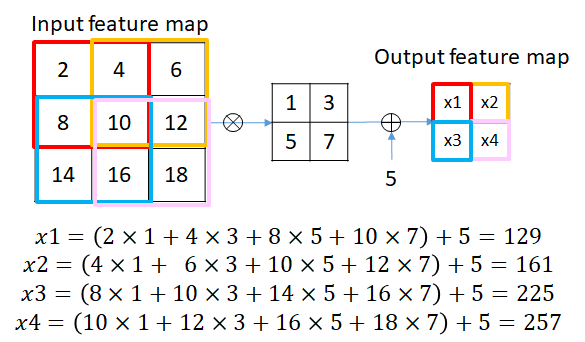

In [18]:
InputImage = torch.FloatTensor([[ 2, 4, 6],
                                [ 8,10,12],
                                [14,16,18]]).unsqueeze(axis=0).unsqueeze(axis=0) # 1,1,2,2

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1)
replace_weight = torch.FloatTensor([[1,3],
                                    [5,7]]).unsqueeze(axis=0).unsqueeze(axis=0) # 1,1,2,2
replace_bias = torch.tensor([5])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('Input feature map:{}'.format(InputImage))
print('weight of conv.:{}'.format(conv.weight.data))
print('bias of conv.:{}'.format(conv.bias.data))
output = conv(InputImage)
print('Output feature map:{}'.format(output))


Input feature map:tensor([[[[ 2.,  4.,  6.],
          [ 8., 10., 12.],
          [14., 16., 18.]]]])
weight of conv.:tensor([[[[1., 3.],
          [5., 7.]]]])
bias of conv.:tensor([5])
Output feature map:tensor([[[[129., 161.],
          [225., 257.]]]], grad_fn=<ThnnConv2DBackward>)


Example 2: Conv.
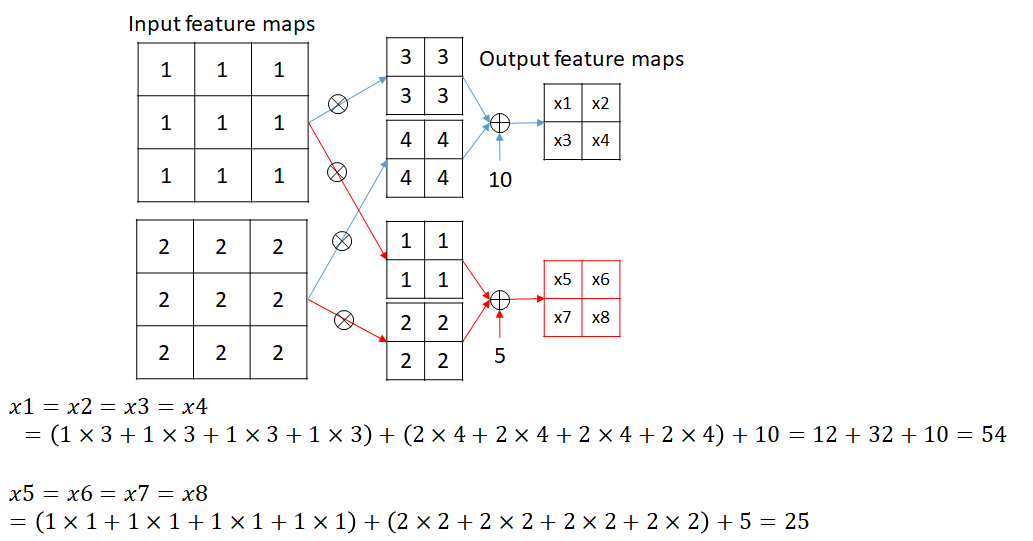

In [19]:
InputImage = torch.FloatTensor([
                                [[ 1,1,1],
                                 [ 1,1,1],
                                 [ 1,1,1]],
                                [[ 2,2,2],
                                 [ 2,2,2],
                                 [ 2,2,2]]
                                ]).unsqueeze(axis=0) # 1*2*3*3

conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2, stride=1) # 2*2*2*2
replace_weight = torch.FloatTensor([
                                    [[[3,3],
                                     [3,3]],
                                    [[4,4],
                                     [4,4]]],
                                    [[[1,1],
                                     [1,1]],
                                    [[2,2],
                                     [2,2]]]
                                    ])
replace_bias = torch.tensor([10,5])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('Input feature map:{}'.format(InputImage))
print('weight of conv.:{}'.format(conv.weight.data))
print('bias of conv.:{}'.format(conv.bias.data))
output = conv(InputImage)
print('Output feature map:{}'.format(output))

Input feature map:tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]])
weight of conv.:tensor([[[[3., 3.],
          [3., 3.]],

         [[4., 4.],
          [4., 4.]]],


        [[[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]]]])
bias of conv.:tensor([10,  5])
Output feature map:tensor([[[[54., 54.],
          [54., 54.]],

         [[25., 25.],
          [25., 25.]]]], grad_fn=<ThnnConv2DBackward>)


----------------------------------
<font color=#0000FF size=3> **快速將權重改成某種分布**
</font>

In [13]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3), stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
conv.weight.data.normal_(0,1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.2152, -0.1962, -0.2651],
          [-0.0582, -0.2000,  0.0533],
          [-0.0094, -0.2791, -0.0262]]]], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[[[ 0.3023, -0.1886, -0.6398],
          [ 1.6285,  1.2086,  0.6949],
          [ 0.2701,  0.5712,  1.3276]]]], requires_grad=True)


(array([19., 26., 21., 18., 13., 16., 20., 11., 22., 26., 18., 17., 24.,
        20., 10.,  9., 15., 24., 24., 15., 20., 21., 24., 24., 24., 21.,
        16., 27., 14., 22., 29., 21., 20., 23., 22., 14., 22., 21., 19.,
        22., 21., 25., 20., 24., 21., 18., 23., 10., 18., 26.]),
 array([-0.03161015, -0.03034988, -0.02908961, -0.02782933, -0.02656906,
        -0.02530878, -0.02404851, -0.02278823, -0.02152796, -0.02026769,
        -0.01900741, -0.01774714, -0.01648686, -0.01522659, -0.01396631,
        -0.01270604, -0.01144577, -0.01018549, -0.00892522, -0.00766494,
        -0.00640467, -0.0051444 , -0.00388412, -0.00262385, -0.00136357,
        -0.0001033 ,  0.00115698,  0.00241725,  0.00367752,  0.0049378 ,
         0.00619807,  0.00745835,  0.00871862,  0.0099789 ,  0.01123917,
         0.01249944,  0.01375972,  0.01501999,  0.01628027,  0.01754054,
         0.01880081,  0.02006109,  0.02132136,  0.02258164,  0.02384191,
         0.02510219,  0.02636246,  0.02762273,  0.02888301,

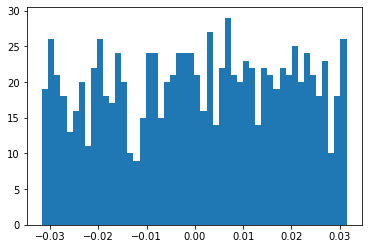

In [14]:

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)
plt.hist(data,50)

(array([ 1.,  0.,  1.,  3.,  2.,  1.,  2.,  3.,  5.,  5., 11.,  6., 19.,
        21., 16., 21., 38., 34., 22., 27., 36., 45., 49., 53., 51., 55.,
        34., 57., 39., 46., 49., 38., 40., 28., 23., 31., 17., 18., 16.,
         8.,  7.,  8.,  1.,  5.,  3.,  1.,  1.,  2.,  0.,  1.]),
 array([-3.1090083 , -2.984487  , -2.8599658 , -2.7354445 , -2.6109233 ,
        -2.486402  , -2.361881  , -2.2373598 , -2.1128385 , -1.9883173 ,
        -1.863796  , -1.7392747 , -1.6147535 , -1.4902323 , -1.3657111 ,
        -1.2411898 , -1.1166686 , -0.9921474 , -0.86762613, -0.74310493,
        -0.6185837 , -0.49406245, -0.36954123, -0.24501999, -0.12049875,
         0.00402248,  0.1285437 ,  0.25306493,  0.3775862 ,  0.5021074 ,
         0.62662864,  0.7511499 ,  0.8756711 ,  1.0001923 ,  1.1247135 ,
         1.2492348 ,  1.373756  ,  1.4982773 ,  1.6227984 ,  1.7473197 ,
         1.871841  ,  1.9963622 ,  2.1208835 ,  2.2454047 ,  2.369926  ,
         2.4944472 ,  2.6189682 ,  2.7434895 ,  2.8680108 ,

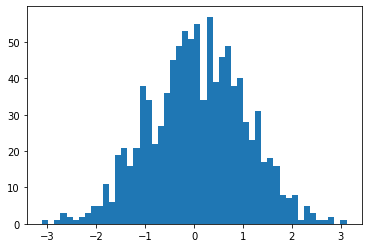

In [15]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
conv.weight.data.normal_(0,1)
data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)
plt.hist(data,50)

<font color=#0000FF size=3> **那要用哪生成方式**
</font>
<font  size=3>
+ 1. 不用理他，用default就好 <br>
+ 2. Xavier系列: Xavier均匀分布、Xavier常態分布 <br>
+ 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>
+ 4. 我要自己發明，但有哪些函數可以用

>Note:<br>
    - 參數初始化可以見torch.nn.init。 <br>
    - 均勻分布 = uniform distribution <br>
    - 常態分布 = normal distribution <br>
    去年課程有介紹過Xavier和kaiming的方法，有興趣知道為什麼要這樣設定的可以看我以前寫的文章[深度學習: Weight initialization和Batch Normalization](https://chih-sheng-huang821.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-weight-initialization%E5%92%8Cbatch-normalization-f264c4be37f5)
    </font>

In [21]:
def histforConv(conv):
    data = conv.weight.data
    data = torch.flatten(data)
    data = data.numpy()
    data = np.squeeze(data)
    plt.hist(data,50)
    plt.show()

### 1. 不用理他，用default就好 <br>
Default用什麼生成，我們來看一下他的生成方式。

default是用均勻分布
$$U(-stdv, stdv)$$
stdv為
$$
stdv = \frac{1}{\sqrt{x}}
$$
x=(output channel個數*kernel sizse)

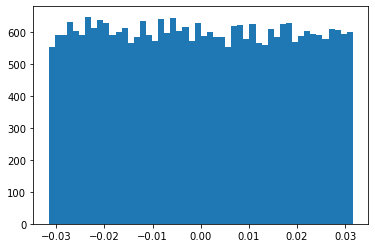

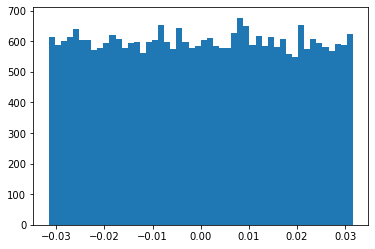

In [17]:
import math
conv = nn.Conv2d(in_channels=10, out_channels=30, kernel_size=(10,10), stride=1) # 30,10,10,10
histforConv(conv)

stdv = 1. / math.sqrt(conv.weight.size(1)*conv.weight.size(2)*conv.weight.size(3))
conv.weight.data.uniform_(-stdv, stdv)
histforConv(conv)


### 2. Xavier系列: Xavier均匀分布、Xavier常態分布

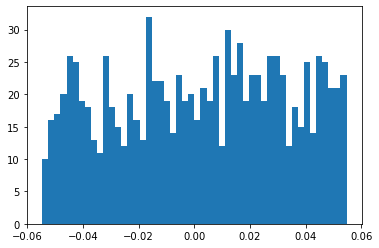

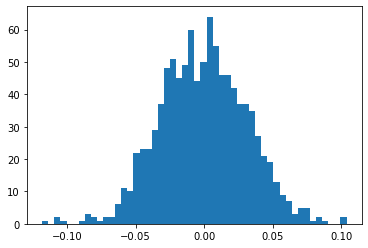

In [23]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.xavier_uniform_(conv.weight)
histforConv(conv)

nn.init.xavier_normal_(conv.weight)
histforConv(conv)

也靠參數(gain)設定可以調整分布的範圍

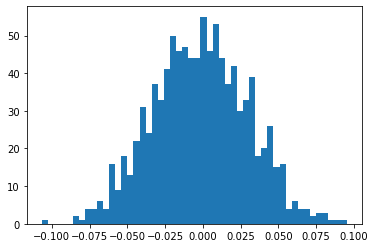

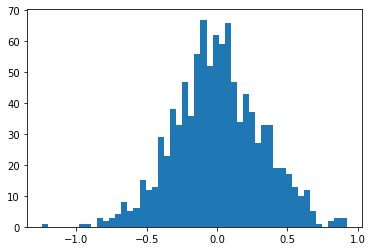

In [24]:
nn.init.xavier_normal_(conv.weight)
histforConv(conv)
nn.init.xavier_normal_(conv.weight, gain=10)
histforConv(conv)

### 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>

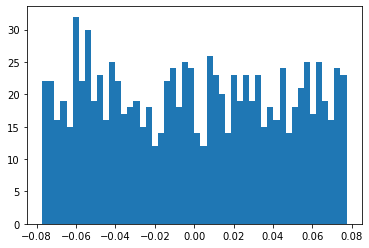

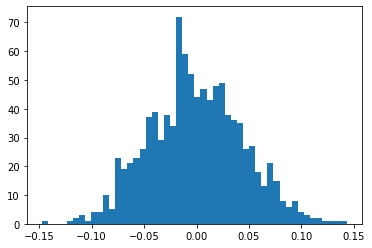

In [20]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.kaiming_uniform_(conv.weight)
histforConv(conv)

nn.init.kaiming_normal_(conv.weight)
histforConv(conv)

### 4. 我要自己發明，但有哪些函數可以用<br>

Reference: [TORCH.NN.INIT](https://pytorch.org/docs/stable/nn.init.html?highlight=nn%20init%20sparse_#torch.nn.init.sparse_)

----------------
1. 均勻分布，參數服從均勻分布a到b之間: <br>
$$
U(a,b)
$$
<code>torch.nn.init.uniform_(tensor, a=0, b=1)</code>

----------------    
2. 常態分布，參數服從常態分布，default為平均數0 標準差1: <br>
$$
N(mean,std)
$$
<code>torch.nn.init.normal_(tensor, mean=0, std=1)</code>  

----------------    
3. 設定為常數 <br>
<code>torch.nn.init.constant_(tensor, val)</code>

----------------
4. 單位化矩陣設定 <br>
<code>torch.nn.init.eye_(tensor)</code>

----------------
5. 正交 <br>
讓生成的權重之間會正交。（必須至少是2維的，對於更高維度的張量，超出的維度會被展平，視作行等於第一個維度。<br>
<code>torch.nn.init.orthogonal_(tensor, gain=1)</code>

----------------
6. sparsity <br>
讓參數生成的時候會稀疏化。
參數sparsity設定為每一列要設定為0的比例。<br>
其他非0的參數生成採用$N(0, std)$，預設std=0.01。<br>
<code>torch.nn.init.sparse_(tensor, sparsity, std=0.01)</code>

----------------

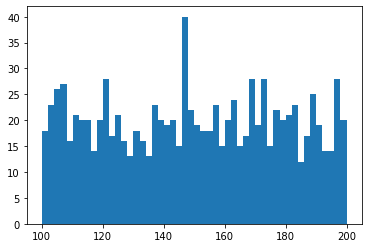

In [25]:
# 1. 均勻分布，參數服從均勻分布a到b之間
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.uniform_(conv.weight,a=100, b=200)
histforConv(conv)

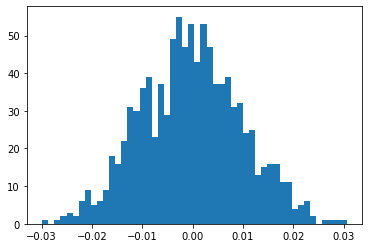

In [30]:
# 2. 常態分布，參數服從常態分布，default為平均數0 標準差1
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.normal_(conv.weight,mean=0, std=0.01)
histforConv(conv)

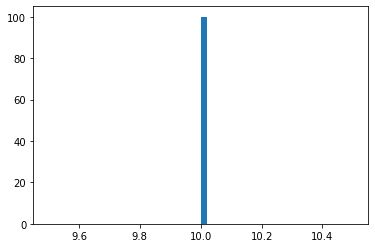

In [23]:
# 3. 設定為常數
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(100,1), stride=1)
nn.init.constant_(conv.weight,val=10)
histforConv(conv)

In [24]:
# 4. 單位化矩陣設定
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.eye_(conv.weight.data[0,0,:,:])
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]], requires_grad=True)


In [25]:
# 5. 正交 
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(2,1), stride=1)
nn.init.orthogonal_(conv.weight)
print('weight of conv layer:\n{}'.format(conv.weight))

data = conv.weight.data
print(data.shape)
data = data.numpy()[:,0,:,0]
print(np.dot(data,np.transpose(data)))


conv = nn.Conv2d(in_channels=10, out_channels=4, kernel_size=(1,1), stride=1)
nn.init.orthogonal_(conv.weight)
data = conv.weight.data
print(data.shape)
data = data.numpy()[:,:,0,0]
print(np.dot(data,np.transpose(data)))


weight of conv layer:
Parameter containing:
tensor([[[[-0.9499],
          [-0.3125]]],


        [[[-0.3125],
          [ 0.9499]]]], requires_grad=True)
torch.Size([2, 1, 2, 1])
[[ 9.9999976e-01 -3.7126032e-08]
 [-3.7126032e-08  1.0000000e+00]]
torch.Size([4, 10, 1, 1])
[[ 9.9999982e-01  9.7125934e-09  1.2959491e-08  5.8572944e-08]
 [ 9.7125934e-09  1.0000002e+00  2.7926085e-08  8.2160987e-08]
 [ 1.2959491e-08  2.7926085e-08  9.9999964e-01 -8.4383025e-08]
 [ 5.8572944e-08  8.2160987e-08 -8.4383025e-08  1.0000001e+00]]


In [32]:
# 6. sparsity 
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.sparse_(conv.weight.data[0,0,:,:], sparsity=0.3, std=10)
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[ -5.9276,   0.0000,   0.0000,  -7.0066,   1.4881],
          [  5.3998,  18.3354, -11.7134,   7.5451,   0.0000],
          [ -5.4261,   0.0000,  15.0550,   0.0000,  -4.5011],
          [  0.0000,  -5.6679,  16.5637,   0.0000,  -0.6354],
          [  0.0000,  15.1858,   0.0000, -11.5504,   0.0000]]]],
       requires_grad=True)
